In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.optimize
from sklearn import svm


Support Vector Machine

In [2]:
datafile = 'data/ex6data1.mat'
mat = scipy.io.loadmat( datafile )
X, y = mat['X'], mat['y']
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

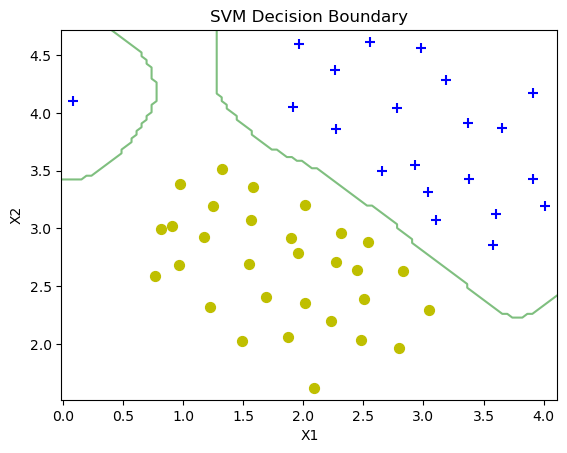

In [3]:
def plotData(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos, 0], X[pos, 1], c='b', marker='+', s=50)
    plt.scatter(X[neg, 0], X[neg, 1], c='y', marker='o', s=50)

def visualizeBoundary(X, y, model):
    """
    Plots the decision boundary for a trained SVM model.
    """
    plotData(X, y)

    # Make classification predictions over a grid of values
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and margins
    plt.contour(xx, yy, Z, colors='g', levels=[0], alpha=0.5, linestyles=['-'])
    plt.title("SVM Decision Boundary")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
# Assuming 'C' and 'gamma' are defined
my_svm = svm.SVC(C=1.0, kernel='rbf', gamma=10)
my_svm.fit(X, y.ravel())
visualizeBoundary(X, y, my_svm)

In [4]:
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    """
    Plots the decision boundary for a trained SVM.
    """
    xvals = np.linspace(xmin, xmax, 100)
    yvals = np.linspace(ymin, ymax, 100)
    zvals = np.zeros((len(xvals), len(yvals)))
    
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            # The original code likely had an error in this section.
            # This corrected version ensures we stay within the array bounds.
            prediction = my_svm.predict(np.array([[xvals[i], yvals[j]]]))
            zvals[i][j] = float(prediction[0])  # Get the first element of the prediction
            
    zvals = zvals.T  # Transpose zvals to match the meshgrid orientation
    
    plt.contour(xvals, yvals, zvals, levels=[0], colors='g')

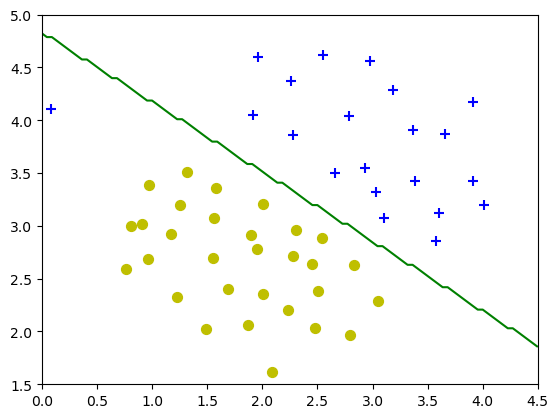

In [5]:
linear_svm = svm.SVC(C=1, kernel='linear')
linear_svm.fit( X, y.flatten() )
plotData(X, y)
plotBoundary(linear_svm,0,4.5,1.5,5)

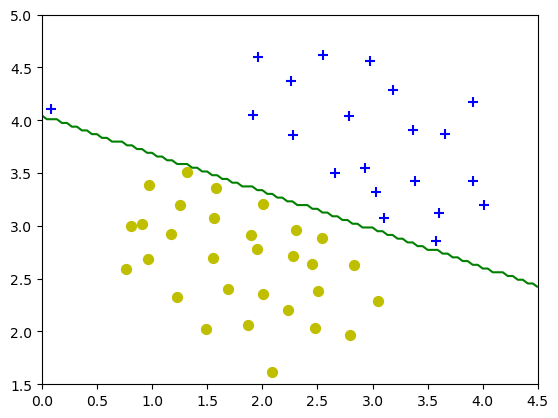

In [6]:
linear_svm = svm.SVC(C=100, kernel='linear')
linear_svm.fit( X, y.flatten() )
plotData(X, y)
plotBoundary(linear_svm,0,4.5,1.5,5)

In [7]:
def gaussKernel(x1,x2,sigma):
    sigmasquared = np.power(sigma,2)
    return np.exp(-(x1-x2).T.dot(x1-x2)/(2*sigmasquared))
print(gaussKernel(np.array([1,2,1]),np.array([0,4,-1]),2.))

0.32465246735834974


In [8]:
datafile = 'data/ex6data2.mat'
mat = scipy.io.loadmat( datafile )
X, y = mat['X'], mat['y']

pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

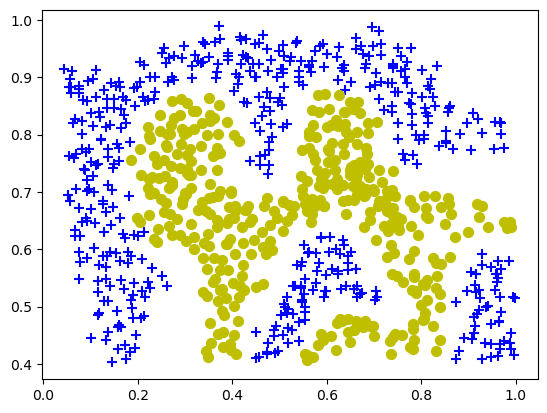

In [9]:
plotData(X, y)

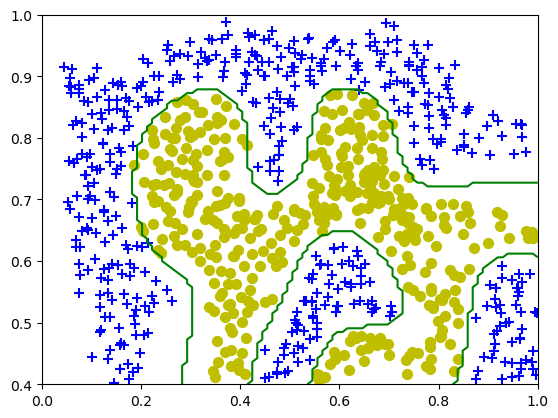

In [10]:
sigma = 0.1
gamma = np.power(sigma,-2.)
gaus_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gaus_svm.fit( X,y.flatten() )
plotData(X, y)
plotBoundary(gaus_svm,0,1,.4,1.0)

In [11]:
datafile = 'data/ex6data3.mat'
mat = scipy.io.loadmat(datafile)
X, y = mat['X'], mat['y']
y = y.flatten()
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

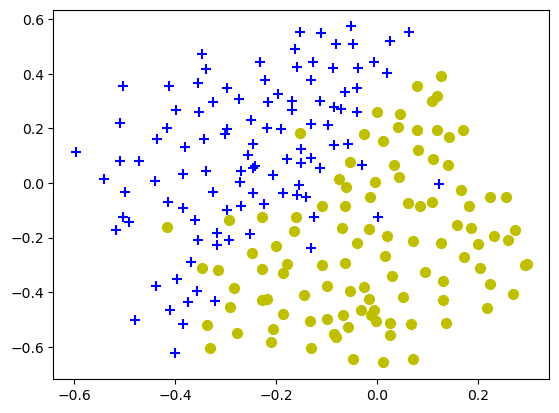

In [12]:
plotData(X, y)

In [13]:
Cvalues = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigmavalues = Cvalues
best_pair, best_score = (0,0),0

for Cvalue in Cvalues:
    for sigmavalue in sigmavalues:
        gamma = np.power(sigmavalue,-2.)
        gaus_svm = svm.SVC(C=Cvalue, kernel='rbf', gamma=gamma)
        gaus_svm.fit( X, y.flatten() )
        this_score = gaus_svm.score(X, y)
        if this_score > best_score:
            best_score = this_score
            best_pair = (Cvalue, sigmavalue)
print("Best C, sigma pair is (%f, %f) with a score of %f."%(best_pair[0],best_pair[1],best_score))

Best C, sigma pair is (1.000000, 0.010000) with a score of 1.000000.


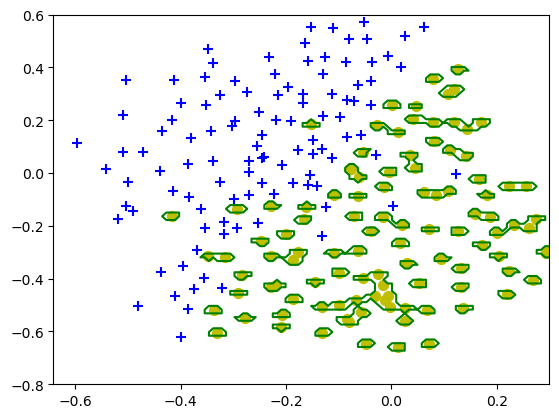

In [14]:
gaus_svm = svm.SVC(C = best_pair[0], kernel='rbf', gamma = np.power(best_pair[1],-2.))
gaus_svm.fit( X,y.flatten() )
plotData(X, y)
plotBoundary(gaus_svm,-.5,.3,-.8,.6)